In [1]:
import matplotlib
from jupyterthemes import jtplot
jtplot.style()
matplotlib.rcParams['figure.figsize'] = (12,10)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
la = np.linalg

from tqdm import tqdm_notebook
import psycopg2

from scipy.sparse import lil_matrix
from keras.models import Model
from keras.layers import Input, Dense, Embedding
from keras.utils import to_categorical

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
connection = psycopg2.connect(dbname="youfood", user="youfood", password="wizard11", host="localhost")
def sql(query):
    with connection as conn:
        with conn.cursor() as cur:
            cur.execute(query)
            return pd.DataFrame(cur.fetchall())

In [4]:
with connection as conn:
    with conn.cursor() as cur:
        cur.execute('SELECT MAX(rID) AS rcount, MAX(uID) AS ucount FROM "Restaurant", "User";')
        rcount, ucount = cur.fetchone()
        cur.execute(""" SELECT R1.rID AS r1ID,  R2.rID AS r2ID
                        FROM "Restaurant" AS R1, "Restaurant" AS R2, "Transaction" AS T1, "Transaction" AS T2
                        WHERE T1.useremail = T2.useremail
                              AND R1.name = T1.restaurant_name
                              AND R1.address = T1.restaurant_address
                              AND R2.name = T2.restaurant_name
                              AND R2.address = T2.restaurant_address;""")
        tuples = cur.fetchall()
    matrix = lil_matrix((rcount + 1, rcount + 1))
    for r1, r2 in tqdm_notebook(tuples):
        matrix[r1, r2] += 1
    del tuples
    for row in tqdm_notebook(range(rcount+1)):
        if matrix[row, :].sum():
            matrix[row, :] /= matrix[row, :].sum()
    matrix = matrix.todense()
pd.DataFrame(matrix)

HBox(children=(IntProgress(value=0, max=11743), HTML(value='')))

HBox(children=(IntProgress(value=0, max=364), HTML(value='')))

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.216216,0.0,0.000000,0.000000,0.000000,0.000000,0.027027,0.027027,0.000000,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.200000,0.000000,0.020000,0.000000,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.021277,0.0,0.000000,0.000000,0.000000,0.000000,0.212766,0.000000,0.000000,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.016667,0.0,0.000000,0.000000,0.000000,0.016667,0.000000,0.200000,0.016667,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,0.200000,...,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0


In [5]:
#x = Input(shape=(1,))
#embed = Embedding(input_length=1, input_dim=rcount+1, output_dim=rcount+1, embeddings_initializer='identity')(x)
x = Input(shape=(rcount+1,))
layer1 = Dense(4, use_bias=False)(x)
y = Dense(rcount+1, use_bias=False)(layer1)
model = Model(inputs=x, outputs=y)
model.compile(optimizer='adagrad', loss='mean_squared_error')

In [14]:
seqs = list(range(rcount+1))
#seqs = seqs.reshape((1,rcount+1))
#print(seqs.shape)
print(matrix.shape)
model.fit(to_categorical(seqs), matrix, epochs = 200, verbose=False)
vecs = model.layers[1].get_weights()[0]

(364, 364)


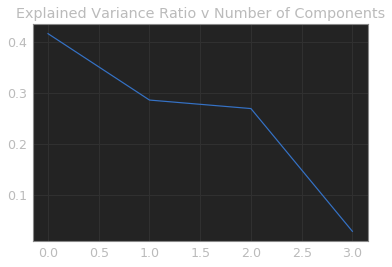

Reconstruction power 1.0000000186264515


In [15]:
exp_reduce = PCA(n_components=vecs.shape[1])
exp_reduce.fit(vecs)
evr = exp_reduce.explained_variance_ratio_
plt.title("Explained Variance Ratio v Number of Components")
plt.plot(range(len(evr)), evr)
plt.show()
print(f"Reconstruction power {sum(evr)}")

In [16]:
reduce1 = PCA(n_components=2)
reduce2 = TSNE(n_components=2)
v1 = reduce1.fit_transform(vecs)
print("SVD/PCA Done")
v2 = reduce2.fit_transform(vecs)
print("TSNE Done")

SVD/PCA Done
TSNE Done


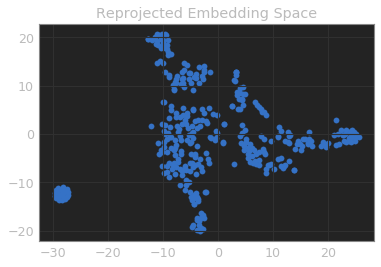

In [17]:
plt.title("Reprojected Embedding Space")
plt.scatter(v2[:,0], v2[:,1])
plt.show()
# OH MY GOD ITS FULL OF CLUSTERS

In [10]:
pd.DataFrame(vecs)

,0,1,2,3
0,-0.042465,0.007366,0.011056,-0.040568
1,-0.077809,-0.095733,-0.031663,0.056401
2,-0.087478,0.068604,-0.061748,0.085078
3,-0.064385,0.081727,0.103970,-0.104996
4,-0.048416,0.033346,-0.049156,-0.055048
5,-0.104957,-0.094990,0.091784,0.065985
6,0.076758,0.039224,0.015758,0.026474
7,-0.092828,0.076408,-0.038259,-0.013406
8,-0.112343,-0.087344,0.006867,-0.060863
9,0.055410,0.114704,0.053150,-0.043238


In [18]:
sql('SELECT rid FROM "Transaction", "Restaurant" WHERE useremail LIKE \'test0%\';')

,0
0,1
1,1
2,1
3,1
4,1
5,2
6,2
7,2
8,2
9,2


In [42]:
rids = sql("""SELECT rid, COUNT(rid)::float/(
                    SELECT COUNT(*)::float FROM "Transaction" WHERE useremail LIKE \'test0@%\'
                ) as count FROM "Transaction", "Restaurant" 
                WHERE useremail LIKE \'test0@%\'
                AND "Restaurant".name = "Transaction".restaurant_name
                AND "Restaurant".address = "Transaction".restaurant_address
            GROUP BY rid;
            """)
rids

,0,1
0,6,0.1
1,64,0.1
2,72,0.1
3,81,0.1
4,101,0.1
5,174,0.1
6,179,0.1
7,207,0.1
8,340,0.1
9,346,0.1


In [52]:
mean_vec = np.zeros((4,))
for _, rid, weight in rids.itertuples():
    mean_vec += vecs[rid]*weight
print(mean_vec)

[-0.05482051  0.04174507  0.01149624  0.0057    ]


In [54]:
orders = list(enumerate(la.norm(vecs-mean_vec, axis=1)))
orders = sorted(orders, key=lambda x: x[1])
orders[:4]

[(146, 0.016522597697606216),
 (341, 0.01714937712812122),
 (216, 0.02126798056831456),
 (170, 0.022347133608128723)]

In [58]:
sql("""SELECT * FROM "Restaurant" WHERE rID = 340""")

,0,1,2,3,4,5,6,7,8
0,"616 E Green St, Champaign, IL 61820",McDonald's,None,(217) 384-4834,https://s3-media2.fl.yelpcdn.com/bphoto/lRgkSC...,40.11043,-88.229836,None,340
